In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Simple%20Linear%20Regression/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.rename(columns={'Delivery Time':'delivery_time'},inplace=True)
df.rename(columns={'Sorting Time':'sorting_time'},inplace=True)

In [5]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

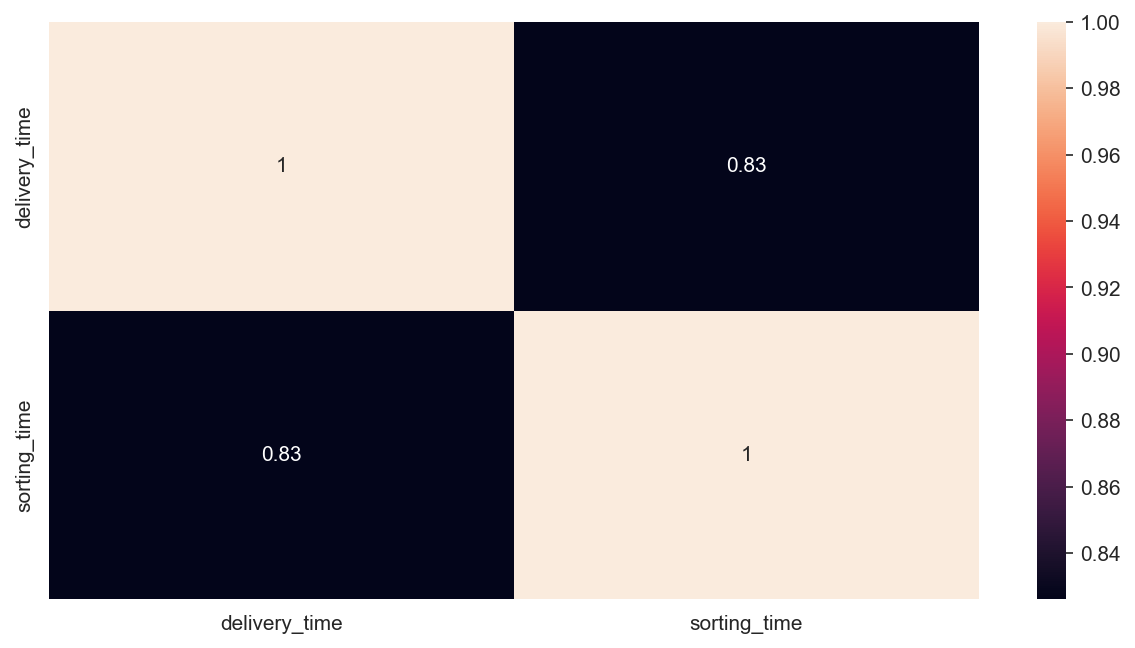

In [6]:
sns.heatmap(df.corr(),annot=True)

### Model Testing

In [7]:
import statsmodels.formula.api as smf

In [22]:
model = smf.ols('delivery_time~sorting_time',data=df).fit()

In [23]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [27]:
# line Equation 
sorting = 12

y = 6.582734*sorting + 1.649020
y

80.64182799999999

In [28]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [25]:
model.rsquared

0.6822714748417231

### Model Pridiction

In [12]:
delivery_time = (6.582734) + (1.649020)*5
delivery_time

14.827834

In [16]:
new_data = pd.Series([5,9,11,12])
new_data

0     5
1     9
2    11
3    12
dtype: int64

In [17]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,9
2,11
3,12


In [18]:
model.predict(data_pred)

0    14.827833
1    21.423913
2    24.721953
3    26.370973
dtype: float64

# Data Transformation

### Sqrt
### Log

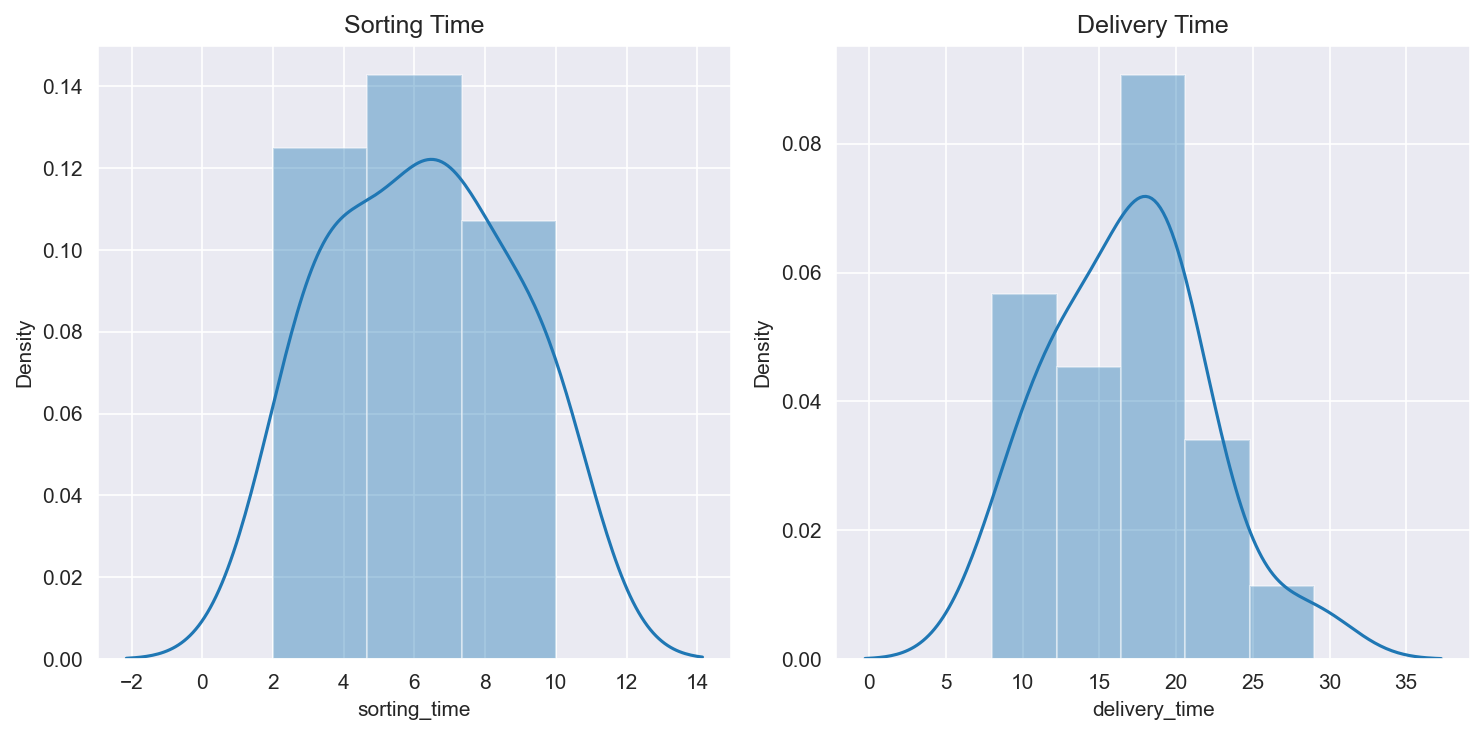

In [31]:
plt.subplot(1,2,1)
sns.distplot(df['sorting_time'])
plt.title('Sorting Time')

plt.subplot(1,2,2)
sns.distplot(df['delivery_time'])
plt.title('Delivery Time')

plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

In [32]:
df['delivery_time'].skew()

0.3523900822831107

In [33]:
df['sorting_time'].skew()

0.047115474210530174

# Log Transformation

In [34]:
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [38]:
df['log_sorting'] = np.log(df['sorting_time'])
df['log_delivery'] = np.log(df['delivery_time'])
df

,delivery_time,sorting_time,log_sorting,log_delivery
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


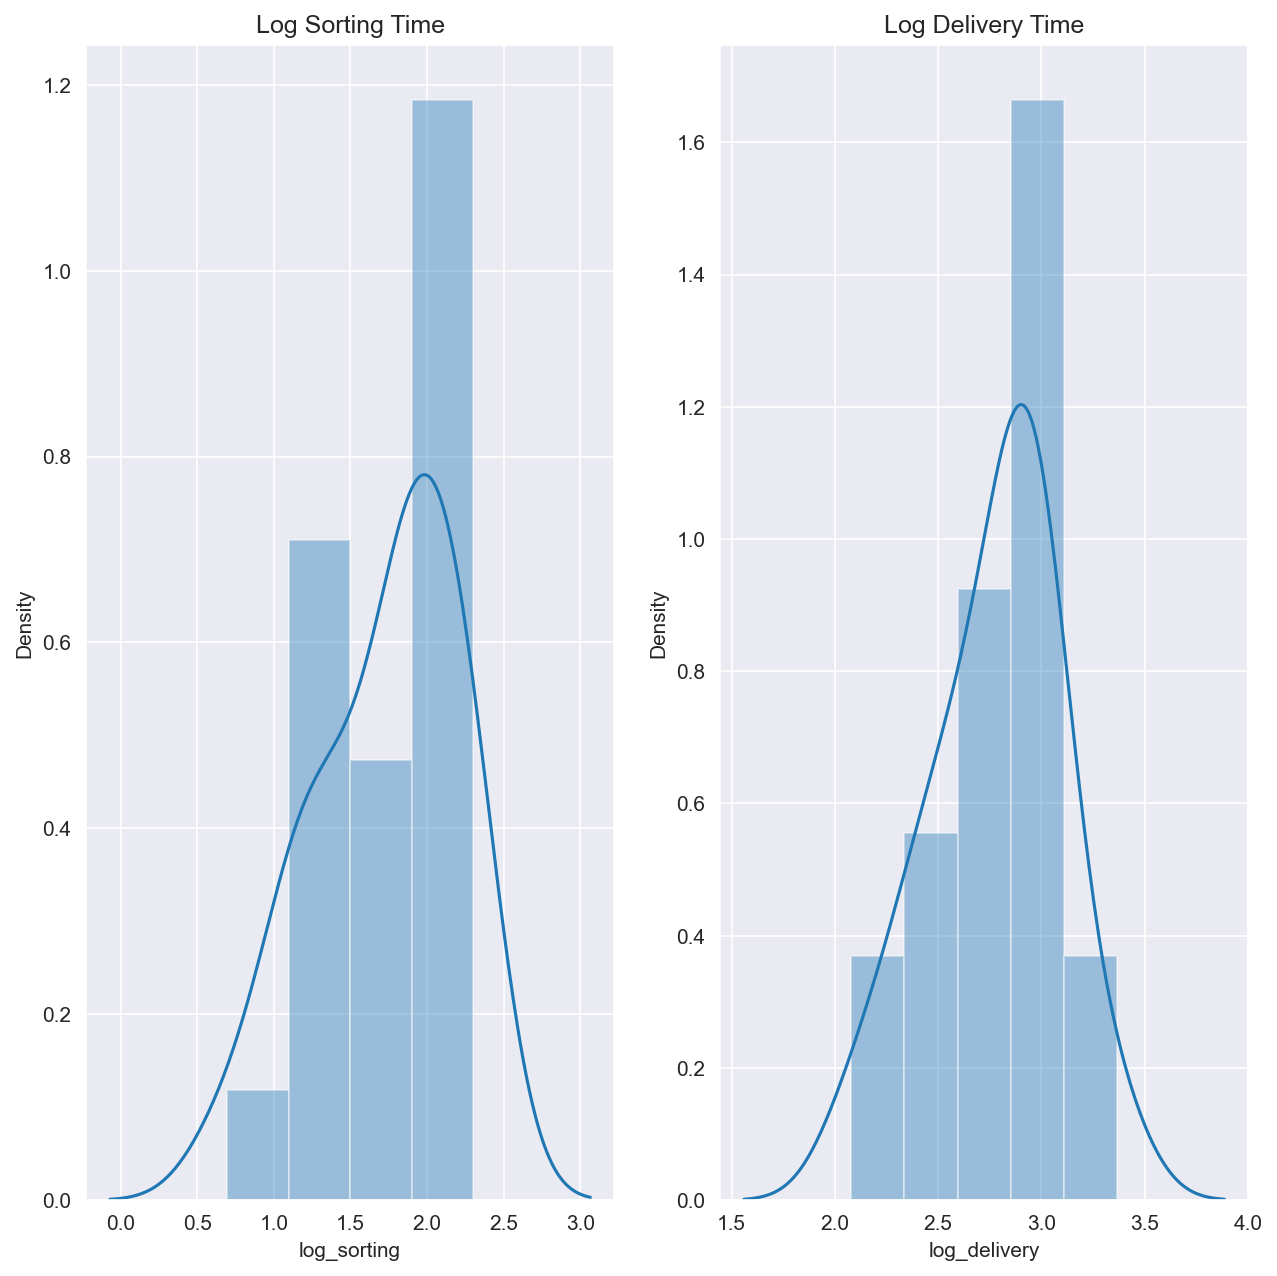

In [41]:
plt.subplot(1,2,1)
sns.distplot(df['log_sorting'])
plt.title('Log Sorting Time')

plt.subplot(1,2,2)
sns.distplot(df['log_delivery'])
plt.title('Log Delivery Time')

plt.rcParams['figure.figsize'] = (10,10)

In [42]:
df['log_delivery'].skew()

-0.4512901148522999

In [44]:
df['log_sorting'].skew()

-0.6052357185134765